In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/var/folders/x2/wr77sg3d5bj_3sj9dhhvxv740000gn/T/ipykernel_5764/2176220798.py:2: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  data_kershaw = pd.read_csv("data/clayton_kershaw_savant_data.csv")


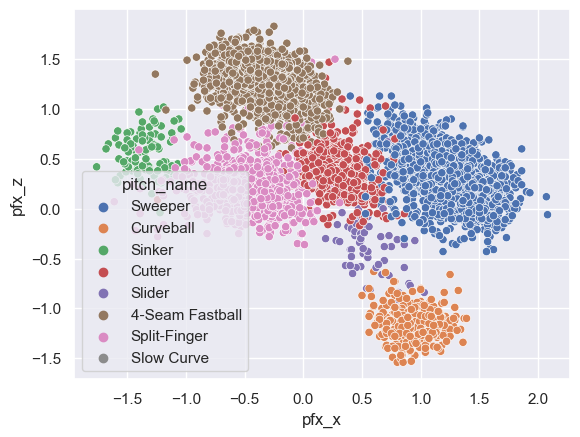

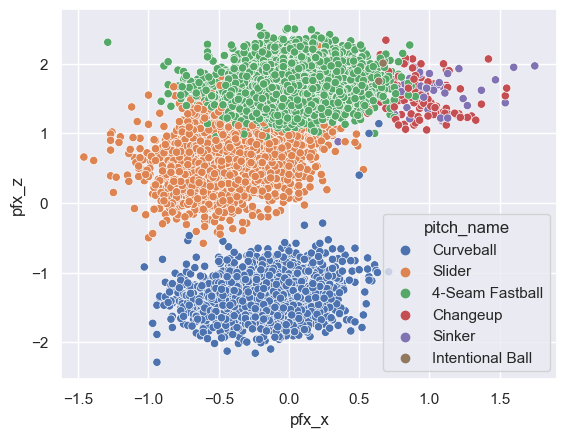

In [56]:

data_ohtani = pd.read_csv("data/shohei_ohtani_savant_data.csv")
data_kershaw = pd.read_csv("data/clayton_kershaw_savant_data.csv")

# pitches_ohtani = data_ohtani[['pitch_type', 'release_speed', 'release_pos_x', 'release_spin_rate', 'release_extension', 'spin_axis',
#        'release_pos_z', 'stand', 'zone', 'description', 'balls', 'strikes', 'game_year', 'inning', 'outs_when_up',
#        'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az',
#        'pitch_number', 'pitch_name']]
pitches_ohtani = data_ohtani[['game_year','pitch_name', 'pitch_type', 'stand','release_speed', 'release_pos_x', 'release_spin_rate', 'release_extension', 'spin_axis', 'pfx_x', 'pfx_z']]
pitches_kershaw = data_kershaw[['game_year','pitch_name', 'pitch_type', 'stand','release_speed', 'release_pos_x', 'release_spin_rate', 'release_extension', 'spin_axis', 'pfx_x', 'pfx_z']]


sns.scatterplot(x='pfx_x', y='pfx_z', data=pitches_ohtani, hue='pitch_name' )
plt.show()
sns.scatterplot(x='pfx_x', y='pfx_z', data=pitches_kershaw, hue='pitch_name' )
# sns.scatterplot(x='release_speed', y='release_spin_rate', data=pitches_ohtani, hue='pitch_name' )
plt.show()


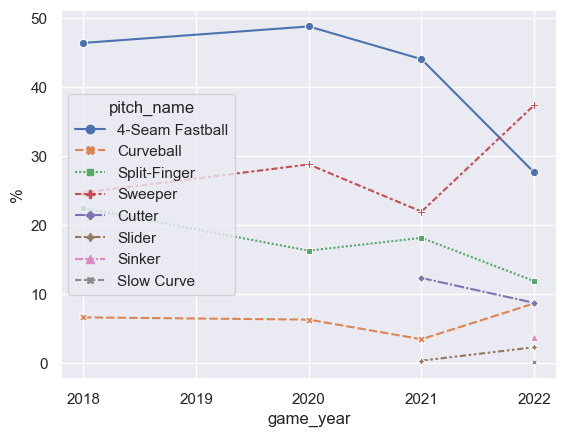

In [51]:
pitch_by_count = pitches_ohtani.groupby(['game_year', 'pitch_name'])[['pitch_name']].agg(count=("pitch_name", "count"))
pitch_by_count['%'] = pitch_by_count['count'] / pitch_by_count.groupby('game_year')['count'].transform('sum') * 100

a = sns.lineplot(x='game_year', y='%', data=pitch_by_count, hue='pitch_name', style='pitch_name' ,markers=True)
_ = a.set_xticks(range(2018, 2023, 1))
_ = a.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])

R    13502
L     4045
Name: stand, dtype: int64


<Axes: xlabel='stand', ylabel='count'>

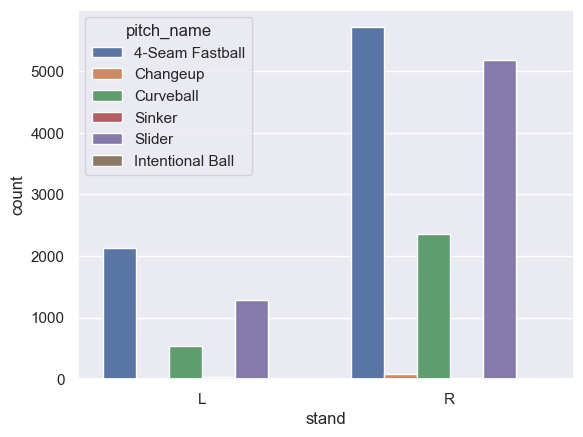

In [57]:
pitch_by_stand = pitches_kershaw.groupby(['stand', 'pitch_name'])[['pitch_name']].agg(count=("pitch_name", "count"))
print(pitches_kershaw['stand'].value_counts())
pitch_by_stand.reset_index(inplace=True)
sns.barplot(x='stand', y='count', data=pitch_by_stand, hue='pitch_name')

Shohei didn't pitch in 2019 due to having Tommy Johns surgery, but he still batted.

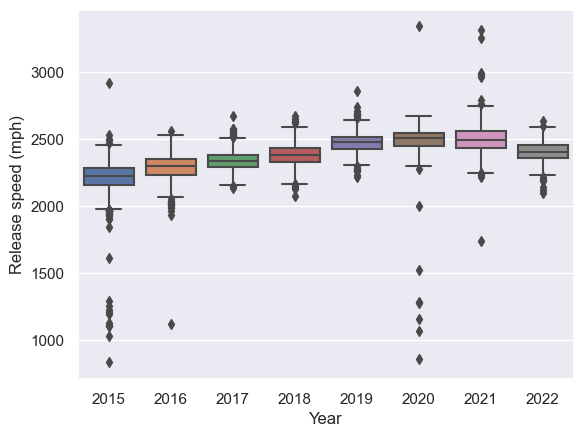

In [58]:
fastballs = pitches_kershaw[pitches_kershaw['pitch_type'] == 'FF']
fb_by_year = fastballs.groupby('game_year')[['release_spin_rate', 'release_speed']].mean()

_ = sns.boxplot(x='game_year', y='release_spin_rate', data=fastballs)
_ = plt.xlabel('Year')
_ = plt.ylabel('Release speed (mph)')
plt.show()